In [1]:
from protein_ligand import PDBProtein, parse_sdf_file
from reconstruct import reconstruct_from_generated
import numpy as np
import scipy.linalg
from PIL import Image, ImageDraw, ImageFont
import rdkit
import sascorer
from pymol import cmd

from rdkit import Chem, DataStructs
from rdkit.Chem import SDWriter, Descriptors, Draw, QED, rdFingerprintGenerator
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import shutil
from tqdm import tqdm

In [77]:
lig_path = './outputs/mxQED_planar_1/106.sdf'

In [78]:
lig_dict = parse_sdf_file(lig_path)

In [79]:
mol = next(iter(Chem.SDMolSupplier(lig_path)))

In [80]:
for atom in mol.GetAtoms():
    print(atom.IsInRingSize(6))

for bond in mol.GetBonds():
    print(bond.GetBondType())

False
True
True
True
True
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
SINGLE
AROMATIC
AROMATIC
AROMATIC
SINGLE
SINGLE
AROMATIC
AROMATIC
AROMATIC
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE


In [6]:
lig_dict

{'element': array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7]),
 'pos': array([[ 18.301 ,  10.829 , -10.884 ],
        [ 16.97  ,  10.501 , -10.585 ],
        [ 15.79  ,  11.208 , -11.152 ],
        [ 16.5527,  12.4894, -12.1588],
        [ 18.5451,  12.2324, -11.9823],
        [ 17.6815,  12.886 , -12.7079],
        [ 19.5213,  10.1578, -10.4569],
        [ 20.7722,  10.5239, -10.5484],
        [ 21.779 ,  11.4087, -11.5552],
        [ 21.5044,  12.8731, -12.562 ],
        [ 20.8332,  13.7273, -13.4772],
        [ 19.8569,  14.49  , -13.8738],
        [ 21.0773,  14.7341, -14.2704],
        [ 22.4807,  14.0934, -13.5687],
        [ 21.962 ,  10.0053, -10.3959]], dtype=float32),
 'bond_index': array([[ 0,  0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,
          7,  7,  8,  8,  9,  9, 10, 10, 10, 10, 11, 12, 13, 14],
        [ 1,  4,  6,  0,  2,  1,  3,  2,  5,  0,  5,  3,  4,  0,  7,  6,
          8, 14,  7,  9,  8, 10,  9, 11, 12, 13, 10, 10, 10,  7]]),
 'bond_type': ar

In [7]:
def find_projection(a,b,c,x,y,z):
    
    m = np.zeros((2,2))
    m[0][0] = 1+a**2
    m[0][1] = a*b
    m[1][0] = a*b
    m[1][1] = 1+b**2
    
    B = np.zeros((2,1))
    B[0][0] = a*z+x-a*c
    B[1][0] = b*z+y-b*c
    
    minv = np.linalg.inv(m)
    res = np.matmul(minv,B)
    
    return np.array([res[0][0], res[1][0], a*res[0][0]+b*res[1][0]+c])
    
def planarize_coords(pos):
    
    center = np.mean(pos, axis=0)
    A = np.c_[pos[:,0], pos[:,1], np.ones(pos.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, pos[:,2])
    # print(C[0]*center[0] + C[1]*center[1] - center[2] + C[2])
    
    rad = np.mean(np.sum((pos-center)**2,axis=1)**0.5)
    # print(rad)
    
    projections = []
    for p in pos:
        proj = find_projection(C[0],C[1],C[2],p[0],p[1],p[2])
        projections.append(proj)
    projections = np.array(projections)
        
    mag = (np.sum((projections-center)**2,axis=1)**0.5).reshape(pos.shape[0],-1)
    vec = ((projections-center)/mag)*rad
    fin = vec+center
    # print(pos)
    # print(fin)
    return fin

In [19]:
for bond in plan.GetBonds():
    print(bond.GetBondType())

AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE


In [2]:
for i in range(1000):
    try:
        cmd.reinitialize()
        cmd.load("outputs/mxQED_planar_1/"+str(i)+".sdf")
        cmd.png("outputs/mxQED_planar_1/"+str(i)+"_.png")
    except:
        pass

 PyMOL not running, entering library mode (experimental)


In [3]:
for i in range(1000):
    try:
        cmd.reinitialize()
        cmd.load("outputs/planar_planar_1/"+str(i)+".sdf")
        cmd.png("outputs/planar_planar_1/"+str(i)+"_.png")
    except:
        pass

In [2]:
data_props = pickle.load(open("data_props.p", "rb"))
data_path = '../../data/crossdocked/crossdocked_pocket10/crossdocked_pocket10/'
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=7)

In [3]:
mol_data = []
with open('./outputs/outputs_1/res.txt', 'r') as f:
    mol_data = f.readlines()

mol_data = [ x.strip().split(' ') for x in mol_data ]
mol_data = [ x[-2:] for x in mol_data ]
mol_data = mol_data[1:]
len(mol_data), mol_data[:10]

(1000,
 [['AROK_MYCTU_1_176_0/2iyw_A_rec_2iyq_adp_lig_tt_docked_1_pocket10.pdb',
   'AROK_MYCTU_1_176_0/2iyw_A_rec_2iyq_adp_lig_tt_docked_1.sdf'],
  ['COMT_MOUSE_44_264_0/5p9s_A_rec_5p9v_7jm_lig_tt_min_0_pocket10.pdb',
   'COMT_MOUSE_44_264_0/5p9s_A_rec_5p9v_7jm_lig_tt_min_0.sdf'],
  ['ESR1_HUMAN_300_553_0/5kcc_A_rec_5tms_7fg_lig_tt_docked_0_pocket10.pdb',
   'ESR1_HUMAN_300_553_0/5kcc_A_rec_5tms_7fg_lig_tt_docked_0.sdf'],
  ['FABPH_HUMAN_1_133_0/5b28_A_rec_4tjz_dka_lig_tt_min_0_pocket10.pdb',
   'FABPH_HUMAN_1_133_0/5b28_A_rec_4tjz_dka_lig_tt_min_0.sdf'],
  ['CCPR_YEAST_69_361_0/1cpe_A_rec_1aeq_2ez_lig_tt_docked_17_pocket10.pdb',
   'CCPR_YEAST_69_361_0/1cpe_A_rec_1aeq_2ez_lig_tt_docked_17.sdf'],
  ['CBP_HUMAN_1079_1197_0/3p1c_A_rec_5ep7_5qr_lig_tt_docked_6_pocket10.pdb',
   'CBP_HUMAN_1079_1197_0/3p1c_A_rec_5ep7_5qr_lig_tt_docked_6.sdf'],
  ['CCPR_YEAST_69_361_0/1cpe_A_rec_1aeq_2ez_lig_tt_docked_14_pocket10.pdb',
   'CCPR_YEAST_69_361_0/1cpe_A_rec_1aeq_2ez_lig_tt_docked_14.sdf'],
  [

In [4]:
for i in tqdm(range(1000)):
    
    try:
        cmd.reinitialize()
        cmd.load("../../data/crossdocked/crossdocked_pocket10/crossdocked_pocket10/"+mol_data[i][0]) #"BXA1_CLOBO_2_425_0/5v8p_B_rec_4hev_axm_lig_tt_docked_3_pocket10.pdb")
        cmd.set("cartoon_transparency", "0.5")
        # cmd.load("../../data/crossdocked/crossdocked_pocket10/crossdocked_pocket10/"+mol_data[i][1]) #"BXA1_CLOBO_2_425_0/5v8p_B_rec_4hev_axm_lig_tt_docked_3_pocket10.pdb")
        cmd.load("./outputs/mxQED_1/"+str(i)+'.sdf')
        cmd.reset()
        cmd.png("outputs/placed_1/"+str(i)+".png")
    except:
        pass

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

 PyMOL not running, entering library mode (experimental)


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:42<00:00,  2.92it/s]


In [5]:
def planarize_measure(lig_path):
    
    newmol = next(iter(Chem.SDMolSupplier(lig_path)))
    rdkit.Chem.rdDepictor.GenerateDepictionMatching3DStructure(newmol, newmol)
    
    with SDWriter('./outputs/tmp.sdf') as w:
        w.write(newmol)
    
    plane_lig_dict = parse_sdf_file('./outputs/tmp.sdf')
    
    finmol = reconstruct_from_generated(plane_lig_dict['pos'], plane_lig_dict['element'])
    return newmol,finmol

In [6]:
def generate_image(rdmol, filname):
    
    rdkit.Chem.rdDepictor.GenerateDepictionMatching3DStructure(rdmol, rdmol)
    pilimage = Draw.MolToImage(rdmol)

    # print(MolToSmiles(rdmol))

    # rdmol = AddHs(rdmol)
    # logp and qed are the same irrespective of hydrogen addition

    logp = (Descriptors.MolLogP(rdmol))
    qed = QED.qed(rdmol)
    # props = QED.properties(rdmol)
    sascore = sascorer.calculateScore(rdmol)

    res = Image.new(pilimage.mode, (300, 350), (255,255,255))
    res.paste(pilimage, (0, 50))

    I1 = ImageDraw.Draw(res)

    params = ("logp = %.2f QED = %.2f SA = %.2f" % (logp, qed, sascore))
    font = ImageFont.truetype("myfont.ttf", 15)
    # print(params)
    # Add Text to an image
    I1.text((40, 25), params, fill=(0, 0, 0), font=font)

    # Display edited image
    res.save('./outputs/'+filname+'.png')
    return res, qed, sascore, logp

In [7]:
f = 0
planar_orig_qeds = []
planar_plan_qeds = []
planar_orig_sascores = []
planar_plan_sascores = []
planar_orig_logps = []
planar_plan_logps = []
planar_ns = []
for i in tqdm(range(1000)):
    try:
        orig, plan = planarize_measure('./outputs/mxQED_1/'+str(i)+'.sdf')
        planar_ns.append(plan.GetNumAtoms())
        orig_img, orig_qed, orig_sascore, orig_logp = generate_image(orig, 'tmp')
        plan_img, plan_qed, plan_sascore, plan_logp = generate_image(plan, 'tmp1')
        planar_orig_qeds.append(orig_qed)
        planar_plan_qeds.append(plan_qed)
        planar_orig_sascores.append(orig_sascore)
        planar_plan_sascores.append(plan_sascore)
        planar_orig_logps.append(orig_logp)
        planar_plan_logps.append(plan_logp)
        res = Image.new("RGB", (600, 350), (255,255,255))
        res.paste(orig_img, (0,0))
        res.paste(plan_img, (300,0))
        res.save('./outputs/planar_1/'+str(i)+'.png')
        with SDWriter('./outputs/planar_1/'+str(i)+'.sdf') as w:
            if(plan_qed >= orig_qed): w.write(plan)
            else: w.write(orig)
    except:
        f += 1
        planar_ns.append(0)
        planar_orig_qeds.append(-1)
        planar_plan_qeds.append(-1)
        planar_orig_sascores.append(-1)
        planar_plan_sascores.append(-1)
        planar_orig_logps.append(-10)
        planar_plan_logps.append(-10)
print(f, 'failed')

planar_orig_qeds = np.array(planar_orig_qeds)
planar_plan_qeds = np.array(planar_plan_qeds)
planar_ns = np.array(planar_ns)
planar_orig_sascores = np.array(planar_orig_sascores)
planar_plan_sascores = np.array(planar_plan_sascores)
planar_orig_logps = np.array(planar_orig_logps)
planar_plan_logps = np.array(planar_plan_logps)

  2%|██                                                                              | 25/1000 [00:02<01:09, 14.00it/s][00:28:35] atom 0 has specified valence (4) smaller than the drawn valence 5.
[00:28:35] atom 1 has specified valence (1) smaller than the drawn valence 2.
  5%|███▉                                                                            | 49/1000 [00:03<00:57, 16.44it/s][00:28:36] atom 0 has specified valence (1) smaller than the drawn valence 2.
[00:28:36] atom 1 has specified valence (4) smaller than the drawn valence 5.
 10%|████████▏                                                                      | 103/1000 [00:07<01:06, 13.58it/s][00:28:40] atom 0 has specified valence (4) smaller than the drawn valence 5.
[00:28:40] atom 1 has specified valence (1) smaller than the drawn valence 2.
 12%|█████████▋                                                                     | 123/1000 [00:08<00:59, 14.66it/s][00:28:41] atom 0 has specified valence (1) smaller than

 89%|██████████████████████████████████████████████████████████████████████▏        | 888/1000 [00:55<00:08, 13.89it/s][00:29:28] atom 0 has specified valence (4) smaller than the drawn valence 5.
[00:29:28] atom 1 has specified valence (1) smaller than the drawn valence 2.
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:03<00:00, 15.75it/s]

59 failed


In [94]:
lig_df = pd.read_csv('../../smiles_2.csv', header=None)
lig_smiles = list(lig_df[0])
lig_paths = list(lig_df[1])

rdmols = []
for smiles in lig_smiles:
    rdmols.append(Chem.MolFromSmiles(smiles))
    
fgrps = [rdkit_gen.GetFingerprint(mol) for mol in rdmols]

In [95]:
planar_similarities = []
for i in tqdm(range(1000)):
    try:
        newmol = next(iter(Chem.SDMolSupplier('./outputs/planar_1/'+str(i)+'.sdf')))
    except:
        planar_similarities.append(-1)
        # where_maxs.append(-1)
        continue
    newimg, qed, sascore, logp = generate_image(newmol, 'tmp')
    # if(qed<0.7): continue
    newsmiles = Chem.MolToSmiles(newmol)
    newmol = Chem.MolFromSmiles(newsmiles)
    newfgrp = rdkit_gen.GetFingerprint(newmol)
    similarity = DataStructs.BulkTanimotoSimilarity(newfgrp, fgrps)
    # similarities.append(np.max(similarity))
    # where_maxs.append(np.where(np.array(similarity) == np.max(similarity)))
    ix = np.argmax(similarity)
    datamol = next(iter(Chem.SDMolSupplier(data_path+lig_paths[ix][1:])))
    dataimg, qed, sascore, logp = generate_image(datamol, 'tmp')
    res = Image.new("RGB", (600, 370), (255,255,255))
    res.paste(newimg, (0,0))
    res.paste(dataimg, (300,0))
    I1 = ImageDraw.Draw(res)
    font = ImageFont.truetype("myfont.ttf", 15)
    I1.text((250, 350), ("Similarity %.2f" % (np.max(similarity))), fill=(0, 0, 0), font=font)
    res.save('./outputs/planar_1/'+str(i)+'_data.png')
    planar_similarities.append(np.max(similarity))
planar_similarities = np.array(planar_similarities)

 17%|█████████████▋                                                                 | 173/1000 [00:18<01:11, 11.51it/s][00:52:14] atom 0 has specified valence (3) smaller than the drawn valence 4.
[00:52:14] atom 1 has specified valence (1) smaller than the drawn valence 2.
 68%|██████████████████████████████████████████████████████                         | 685/1000 [00:58<00:24, 12.86it/s][00:52:54] atom 0 has specified valence (3) smaller than the drawn valence 4.
[00:52:54] atom 2 has specified valence (1) smaller than the drawn valence 2.
 75%|███████████████████████████████████████████████████████████▌                   | 754/1000 [01:03<00:18, 13.52it/s][00:52:59] atom 10 has specified valence (3) smaller than the drawn valence 4.
[00:52:59] atom 16 has specified valence (3) smaller than the drawn valence 4.
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.86it/s]


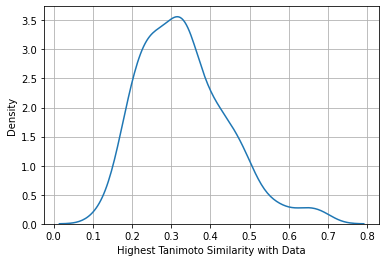

In [96]:
sns.kdeplot(data=np.delete(planar_similarities, np.where(planar_ns<10)), label = 'planar')
# sns.kdeplot(data=np.delete(all_similarities, np.where(all_ns<10)), label = 'all')
# sns.kdeplot(data=data_props['sascore'], label = 'data')
# plt.legend()
plt.grid()
plt.xlabel('Highest Tanimoto Similarity with Data')
plt.show()

In [97]:
similarities_2 = []
for i in range(1000):
    if(planar_ns[i]<8): similarities_2.append(-1)
    else: similarities_2.append(planar_similarities[i])
similarities_2 = np.array(similarities_2)

sorted_ix = np.argsort(-similarities_2)

for i in tqdm(range(1000)):
    if(similarities_2[sorted_ix[i]] == -1): continue
    
    shutil.copy('outputs/planar_planar_1/'+str(sorted_ix[i])+'_data.png', 'outputs/planar_planar_1/top_tanimoto/'+str(i)+'.png')

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 280.98it/s]


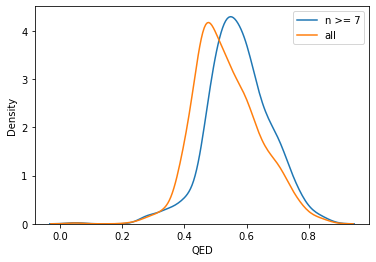

In [22]:
sns.kdeplot(data=np.delete(planar_orig_qeds, np.where(planar_ns<7)), label = 'n >= 7')
sns.kdeplot(data=np.delete(planar_orig_qeds, np.where(planar_ns<=0)), label = 'all')
plt.legend()
plt.xlabel('QED')
plt.show()

In [8]:
x = 0
for i in tqdm(np.argsort(-planar_orig_qeds)[:100]):
    
    try:
        shutil.copy("../../data/crossdocked/crossdocked_pocket10/crossdocked_pocket10/"+mol_data[i][0], "outputs/fin_files_1/"+str(x)+".pdb")
        shutil.copy('outputs/mxQED_1/'+str(i)+'.sdf', 'outputs/fin_files_1/'+str(x)+'.sdf')
        
        cmd.reinitialize()
        cmd.load("./outputs/mxQED_1/"+str(i)+'.sdf')
        cmd.load("../../data/crossdocked/crossdocked_pocket10/crossdocked_pocket10/"+mol_data[i][0]) #"BXA1_CLOBO_2_425_0/5v8p_B_rec_4hev_axm_lig_tt_docked_3_pocket10.pdb")
        cmd.set("cartoon_transparency", "0.5")
        # cmd.load("../../data/crossdocked/crossdocked_pocket10/crossdocked_pocket10/"+mol_data[i][1]) #"BXA1_CLOBO_2_425_0/5v8p_B_rec_4hev_axm_lig_tt_docked_3_pocket10.pdb")
        # cmd.load("./outputs/mxQED_planar_1/"+str(i)+'.sdf')
        cmd.reset()
        cmd.png("outputs/fin_1/"+str(x)+"pl.png")
        
        cmd.reinitialize()
        cmd.load("../../data/crossdocked/crossdocked_pocket10/crossdocked_pocket10/"+mol_data[i][0]) #"BXA1_CLOBO_2_425_0/5v8p_B_rec_4hev_axm_lig_tt_docked_3_pocket10.pdb")
        cmd.png("outputs/fin_1/"+str(x)+"p.png")
        
        shutil.copy('outputs/mxQED_1/'+str(i)+'.png', 'outputs/fin_1/'+str(x)+'l.png')
    except:
        pass
    
    x += 1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:03<00:00,  1.58it/s]


In [100]:
planar_orig_qeds.shape

(1000,)